# LLC in the North Pacific

In [2]:
%matplotlib inline

In [1]:
# imports
from importlib import reload

import os
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs

In [3]:
sns.set_theme()
sns.set_style('whitegrid')

# Load up

In [4]:
tbl_file = 's3://llc/Tables/test_uniform_r0.5_test.feather'
llc_table = ulmo_io.load_main_table(tbl_file)
llc_table['DT'] = llc_table.T90 - llc_table.T10

Read main table: s3://llc/Tables/test_uniform_r0.5_test.feather


# Find the North Pacific Outliers

## LL

In [5]:
low_LL = llc_table.LL < -1000.

In [6]:
llc_table[low_LL].head()

,lat,lon,row,col,datetime,LLC_file,pp_file,pp_root,field_size,mean_temperature,...,pp_idx,pp_type,LL,U_mean,V_mean,U_rms,V_rms,UV_mean,UV_rms,DT
783,67.188095,-23.958920,12576,754,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,3.729549,...,159518,0,-1572.340332,-0.281453,0.158492,0.261221,0.134370,0.431550,0.329650,5.527000
840,66.812950,-25.000072,12543,694,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,4.749477,...,372305,0,-2479.766602,-0.105471,0.036228,0.172236,0.207551,0.213380,0.189863,6.282001
893,66.446411,-26.016121,12510,635,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,4.551929,...,668796,0,-2276.197021,-0.228306,0.055053,0.310624,0.191577,0.457737,0.296138,7.455000
946,66.067635,-28.378588,12490,509,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,1.281320,...,486404,0,-2080.692627,-0.703649,-0.127883,0.283218,0.189620,0.995137,0.400462,3.685000
947,66.066307,-26.997938,12474,577,2011-09-30,s3://llc/ThetaUVSalt/LLC4320_2011-09-30T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,2.793712,...,194772,0,-5298.087891,-0.287993,-0.181074,0.395213,0.203101,0.559434,0.406571,7.779000


## Geography

In [8]:
NP = (np.abs(llc_table.lat-40) < 10.) & (np.abs(llc_table.lon-170) < 10.)

## Combined

In [11]:
np.sum(low_LL & NP)

35

In [12]:
llc_NP = llc_table[low_LL & NP]
llc_NP.head()

,lat,lon,row,col,datetime,LLC_file,pp_file,pp_root,field_size,mean_temperature,...,pp_idx,pp_type,LL,U_mean,V_mean,U_rms,V_rms,UV_mean,UV_rms,DT
271069,42.213848,166.177078,10315,9768,2012-01-31,s3://llc/ThetaUVSalt/LLC4320_2012-01-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,8.619560,...,577629,0,-1090.201904,0.232489,0.076634,0.139546,0.125108,0.330627,0.194253,6.489000
271075,42.213848,170.427078,10315,9972,2012-01-31,s3://llc/ThetaUVSalt/LLC4320_2012-01-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,7.028649,...,67948,0,-1288.111572,0.383200,-0.029154,0.238675,0.129998,0.544237,0.333801,6.631000
271339,41.811443,168.406250,10287,9875,2012-01-31,s3://llc/ThetaUVSalt/LLC4320_2012-01-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,9.330306,...,664748,0,-1457.142822,0.424343,-0.115372,0.151610,0.168116,0.600111,0.214409,6.856000
271340,41.811443,169.093750,10287,9908,2012-01-31,s3://llc/ThetaUVSalt/LLC4320_2012-01-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,8.975707,...,163995,0,-1517.261108,0.485405,0.063391,0.154532,0.162886,0.686466,0.218541,7.122000
271341,41.811443,169.802078,10287,9942,2012-01-31,s3://llc/ThetaUVSalt/LLC4320_2012-01-31T00_00_...,s3://llc/PreProc/LLC_uniform_test_preproc.h5,llc_std,64,9.804270,...,34386,0,-1054.704590,0.533268,0.068652,0.159731,0.111020,0.754154,0.225894,6.887001


# View

In [19]:
cutout = llc_NP.iloc[2]

In [20]:
img, pp_hf = llc_io.grab_image(cutout, close=False, pp_hf=pp_hf)

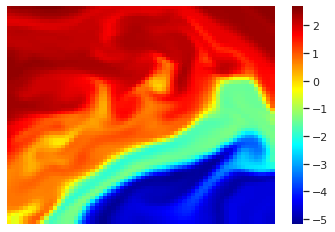

In [21]:
pal, cm = plotting.load_palette()
ax = sns.heatmap(img, xticklabels=[], yticklabels=[], cmap=cm,
             cbar=True)